project-005-20  
# How to Diagnose Patient's Heart Disease Through Medical Examination (Medical Measurement)

# Introduction 
---



**background information**:  
Heart disease is a medical condition in which the heart functions poorly in comparison to an average person. This medical condition has a large range of issues such as: coronary blood vessels being blocked or narrowed, angina (discomfort), unstable angina, heart attacks, heart failure, blood pressure problems, valve disease, and Arrhythmia (heart rhythm problems). 


There are a variety of predictive factors that help doctors diagnose whether someone has or does not have heart disease. The research that our group is conducting uses supervised classification to take in factors: 

- `Age` -years alive
- `chest_pain_type` – Chest pain type:  1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 4 –
- asymptomatic
- `resting_bp`  – resting blood pressure (mm Hg)
- `cholestrol` – cholesterol levels (mg/dl)
- `max_heart_rate`  – max hearrate (BPM)
- `exercise_angina`  – exercised induced angina (Binary yes/no)
- `oldpeak` – ST segment depression/concave induced by exercise 
- `slope` – slope of the ST segment: 1 – upsloping, 2 – flat, 3 - down sloping
- `thal` – heart defect: 3 – normal, 6 - fixed defect, 7 - reversable defect
- `heart_disease`  – truth data (yes/no heart disease)

and we do not consider these factors:

- `Sex` – gender
- `fbs` – 1 day no eating blood sugar levels is >120mg/dl (binary yes/no
- `rest_ecg`  – resting electrocardiogram results
- `ca` – number of major vessels colored by fluoroscopy (0-3)  


**why those varible are selected :**  
<span style="color:red">
**Need explaination**
</span>



**identify and describe the dataset that was used to answer the question** (francesco)
The dataset that we will be using to classify whether a person does or does not have heart disease comes from the July, 1988, V.A. Medical Center Long Beach and Cleveland Foundation. This dataset contains 13 predictive factors being: age, chest pain type, resting blood pressure, cholesterol levels, maximum heart rate, exercise-induced angina, ST segment depression, slope of the ST segment, and heart defect, along with 1 binary truth factor of heart disease. There are 303 rows for the 14 variables in our dataset. We will be using 9 of the 13 predictive variables applied to KNN nearest neighbor classification to attempt to accurately predict if a person does or does not have heart disease. In the metadata, Cleveland has been the only data set that has been used by researchers to predict whether a person does or does not have heart disease. The methods from the researchers are as follows: Detrano et al. 1889 used a discriminate logistic regression function and achieved a 77% accuracy, David & Kibler (n.d.) used an instance-based prediction (memory learning) and gained 74.8-77.0% accuracy, and Gennari et al. (1989) used a clustering classification system and achieved a 78.95 accuracy. Our group will be applying a KNN classification algorithm in memory of Gennari et al. (1989) because we have not learned logistic regression nor instance prediction.
<span style="color:red">
**Need explaination**
</span>

# Method
---

**describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.**

<ul>
<li>We perform an analysis on a dataset related to heart disease diagnosis. Initially, we import the dataset from a source and renames the columns with more meaningful names. Then, perform data cleaning and prepares the dataset for the analysis. The variables that are not needed for the analysis are removed.</li>

<li>The analysis begins by splitting the dataset into a **training** and testing set with a 75/25 ratio. <ul><li>The class has training data with observations that were used to predict the category of testing data using a classifier.</li></ul> Later, we visualize the data to analyse the relationship between variables and heart disease.</li>           

<li>Next,we check for missing values and identifies NA values in the training data rows with "?". If any NA values are present, they are removed from the dataset, and the rows with "?" are filtered out from the training set.</li>

<li>We continue the analysis by using the **K-Nearest Neighbors Classification algorithm**.
    <ul><li> We start with our recipe setting the predictor and target variable, define the model specification for kknn.</li>
        <li>We use vfold cross validation to get the best K value</li> 
       <li>Then fit our model as a part of our knn workflow</li>
    </ul>
    Since the curse of dimensionality can be a problem because of 9-dimensions being used, we manually tested the fit of the model to identify the most important variables for the analysis.</li>

<li>Finally, the performance of the model is evaluated using the testing set, and the accuracy of the model is reported.</li>
</ul>

# Expected Outcomes and Significance
---
- What do you expect to find?

    The main goal of this project is to create a model that can accurately predict the presence or absence of heart disease based on the measurements of the patient. We expect to find the most important predictors of heart disease, as well as their relative importance in predicting the disease. In addition, we hope to determine the optimal model for predicting heart disease, which will offer insights into the underlying patterns in the data.
    
- What impact could such findings have?

    The findings of this study could have a significant impact on the diagnosis and treatment of heart disease. Early detection of heart disease can improve the patients prognosis, and accurate prediction models can help healthcare providers make educated choices. Finding the key risk factors for heart disease can help to better target interventions and preventative measures. Finally, this study could lead to future questions about the underlying mechanisms of heart disease and how to improve the accuracy of prediction models.

- What future questions could this lead to?

    The study's findings could pave the way for future research into the role of genetic factors in heart disease, as well as the impact of lifestyle factors like diet and exercise. Furthermore, additional research could be conducted to determine whether the predictors of heart disease differ between different populations, such as ethnic or age groups. Finally, more work could be done to increase the prediction model's accuracy, such as adding more variables or using more sophisticated machine learning methods.  
    
<span style="color:blue">
**IMPROVEMENT required**
</span>


## Exploratory Data Analysis:
---
### Loading libaray needed:

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6) 
library(dplyr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Load and wrangle data set
---
#### Clean the date set 
- adding columns name
- change sex from (1,0) to male vs female
- change the Range of num from (0-4) to (0-1).
   - Our main task is to classify to presence or absence of heart disease rather than the 4 levels of heart disease. 
   - Therefore, transform the heart disease level from 0 (0, absence of heart disease) to 1 (1,2,3,4 presence of heart disease)
   
   
Noted that every varible has its own column and each row is a single observation, each value is in the single cell. Therefore the date itself is a tidy data. 

In [2]:
#use download.file to read dataset from the web into R
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland.csv")
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) 
heart_disease_data
print("DataSet 1 : The raw data set")


#rename the columns name
heart_disease_data <- heart_disease_data |>
                       rename( age = X1,
                               sex = X2,
                               chest_pain_type = X3,
                               resting_bp = X4,
                               cholestrol = X5,
                               fbs = X6,
                               rest_ecg = X7,
                              max_heart_rate = X8,
                              exercise_angina =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              heart_disease = X14)

#create heart_disease_diagnosism columns which transfrom from num with 0-1 values. 
heart_disease_data <- mutate(heart_disease_data, heart_disease_diagnosis = case_when(heart_disease == 0 ~ 0,
                                                                     heart_disease == 1| heart_disease == 2 | heart_disease == 3| heart_disease == 4 ~ 1))

#change the sex from binary to male VS female. 
heart_disease_data <- mutate(heart_disease_data, sex = case_when(sex == 0 ~ "male",sex == 1 ~ "female"))

#change thal (Predictors) columns to numerical and heart_disease_diagnosis (Our class) to factor.
heart_disease_data <- heart_disease_data |> mutate(thal = as.numeric(thal),heart_disease_diagnosis = as.factor(heart_disease_diagnosis))

#Remove the varible we dont want 
heart_disease_data <- heart_disease_data |> mutate(thal = as.numeric(thal),heart_disease_diagnosis = as.factor(heart_disease_diagnosis))          

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


[1] "DataSet 1 : The raw data set"


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [3]:
heart_disease_data
print("Data Set 2 : Cleaned data set ")

age,sex,chest_pain_type,resting_bp,cholestrol,fbs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,heart_disease,heart_disease_diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6,0,0
67,female,4,160,286,0,2,108,1,1.5,2,3.0,3,2,1
67,female,4,120,229,0,2,129,1,2.6,2,2.0,7,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3,1,1
38,female,3,138,175,0,0,173,0,0.0,1,?,3,0,0


[1] "Data Set 2 : Cleaned data set "


### Split Data into traning Set and testing set.
Data Set was split into a training set and a testing set where the training Set is 75% of the original dataset and the testing Set is 25% of the original dataset.

In [4]:
set.seed(1231) # make sure reproducibility 
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = heart_disease_diagnosis)   
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

## summarize the data
----

In [5]:
num_of_observation <- nrow(hd_train)
num_of_observation 
print("we have 227 observation in our traning Set")
num_of_heart_disease <- hd_train |> 
                        group_by(heart_disease_diagnosis) |> 
                        summarise(percentage = n()/227)

num_of_heart_disease
print("Table 1: Distribution of heart disease diagnosis")
num_of_sex <- hd_train |> 
                        group_by(sex) |> 
                        summarise(percentage = n()/227)
num_of_sex
print("Table 2: Distribution of sex")

[1] 227

[1] "we have 227 observation in our traning Set"


heart_disease_diagnosis,percentage
<fct>,<dbl>
0,0.5418502
1,0.4581498


[1] "Table 1: Distribution of heart disease diagnosis"


sex,percentage
<chr>,<dbl>
female,0.6872247
male,0.3127753


[1] "Table 2: Distribution of sex"


For table 1  
In our training data set, the group of people with absence heart disease and The group of presence have a close amount of total number  

For table 2,   
The female is the majority sex, 69%. Since sex is imblanced in our data, we exlude it because it may cause classifor has baised output

In [6]:
sumOfData <- hd_train |> 
             select(age,resting_bp,cholestrol,max_heart_rate) |>
             summary()
sumOfData
print("Table 3 for important numerical varibles")

      age          resting_bp      cholestrol    max_heart_rate 
 Min.   :29.00   Min.   : 94.0   Min.   :126.0   Min.   : 88.0  
 1st Qu.:48.00   1st Qu.:120.0   1st Qu.:212.0   1st Qu.:132.0  
 Median :56.00   Median :130.0   Median :243.0   Median :151.0  
 Mean   :54.71   Mean   :131.4   Mean   :247.7   Mean   :148.6  
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:274.5   3rd Qu.:165.0  
 Max.   :77.00   Max.   :192.0   Max.   :564.0   Max.   :202.0  

[1] "Table 3 for important numerical varibles"


**Analysing summary table**

For age, we can see our Range is from 29 years old to 76 years old. Observations are all adults, and the majority are around 50 years old or elder.

For resting blood pressure (resting_bp), the normal range for resting blood pressure is **under 120**. From the summary table, we can observe the majority of observations have higher blood pressure than normal health standards. 

For cholesterol level (cholestrol),by the graph, the mean value gives a 247.7 mg/dl cholesterol level which is considered a high cholesterol level. We can assume that majority of our observation has a high cholesterol level

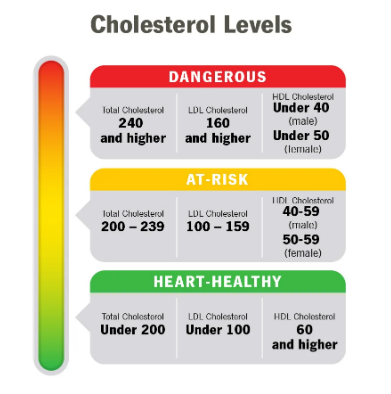


**Find missing value**
- Making sure we only use observation with real value to train our model. 
- leaving rows with missing value may lead to model with low accuarcy.

In [7]:
print("Find and Remove Missing Value")

(num_of_missing_columns <- sum(is.na(hd_train)))
## Noted that there is 2 NA values in training data
(num_of_missing_columns <- sum(is.null(hd_train)))
## Noted that there is no Null values in traning data. 

(row_with_question <- hd_train |> 
                    filter(ca == "?"))
## Noted that there is 3 row with "?" in variable ca, which means they dont have measurement of the ca 
print("Data Set 3 : Row with value ? ")

## We should filter out those 3 row in our traning Set 
hd_train <- hd_train |>
            filter(ca != "?") |> 
            drop_na() #remove row that contains NA value. 

[1] "Find and Remove Missing Value"


[1] 2

[1] 0

age,sex,chest_pain_type,resting_bp,cholestrol,fbs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,heart_disease,heart_disease_diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
52,female,3,138,223,0,0,169,0,0.0,1,?,3,0,0
58,female,2,125,220,0,0,144,0,0.4,2,?,7,0,0
43,female,4,132,247,1,2,143,1,0.1,2,?,7,1,1


[1] "Data Set 3 : Row with value ? "



## Data Visualization 
---

#### For categorical varible  
- Show the distribution of each categorical variable in the Heart disease Group and No heart disease Group respectively.  

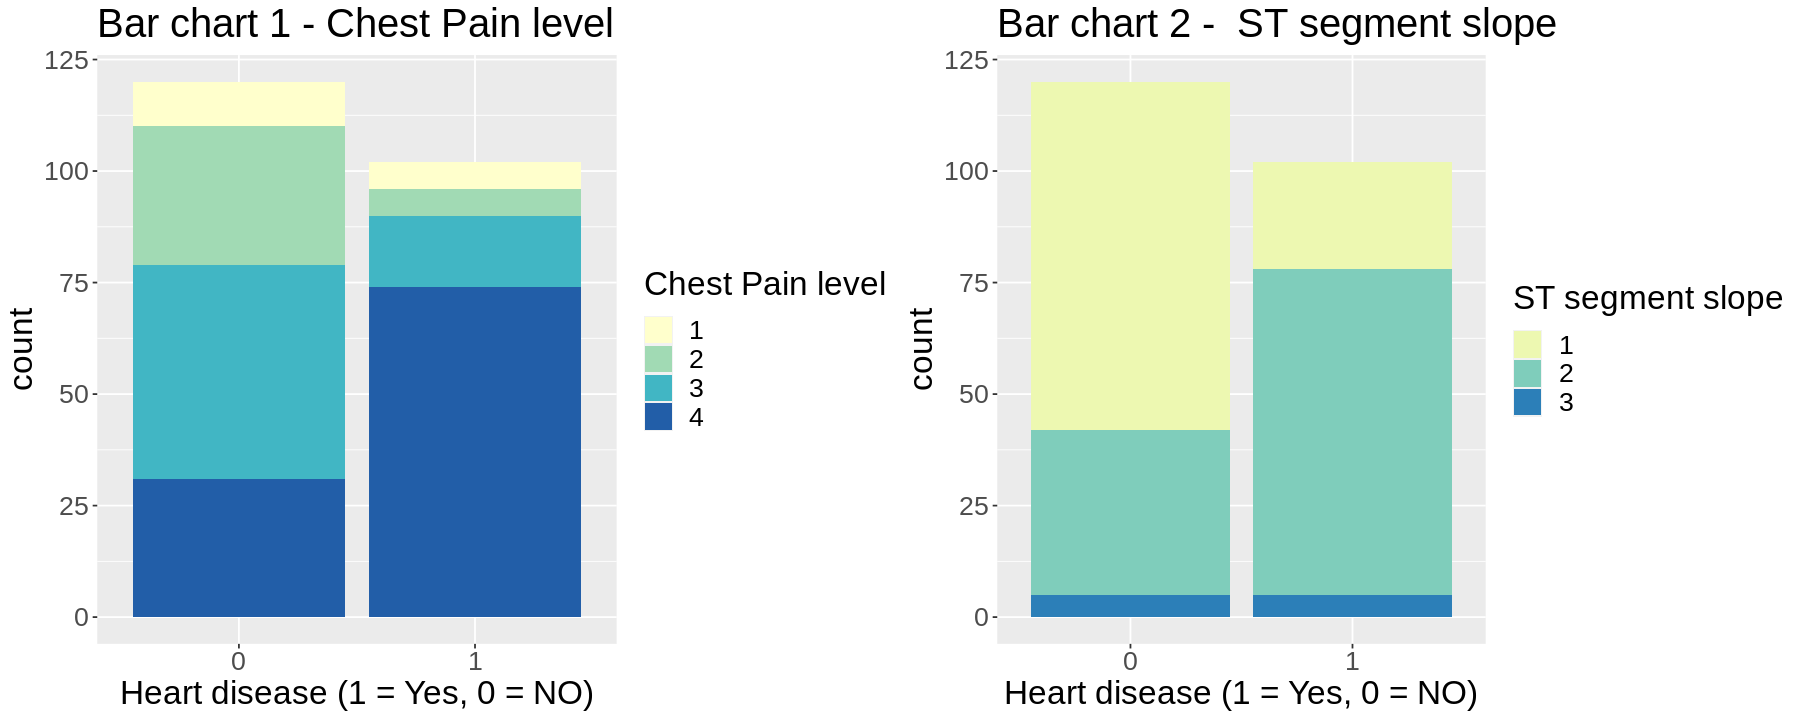

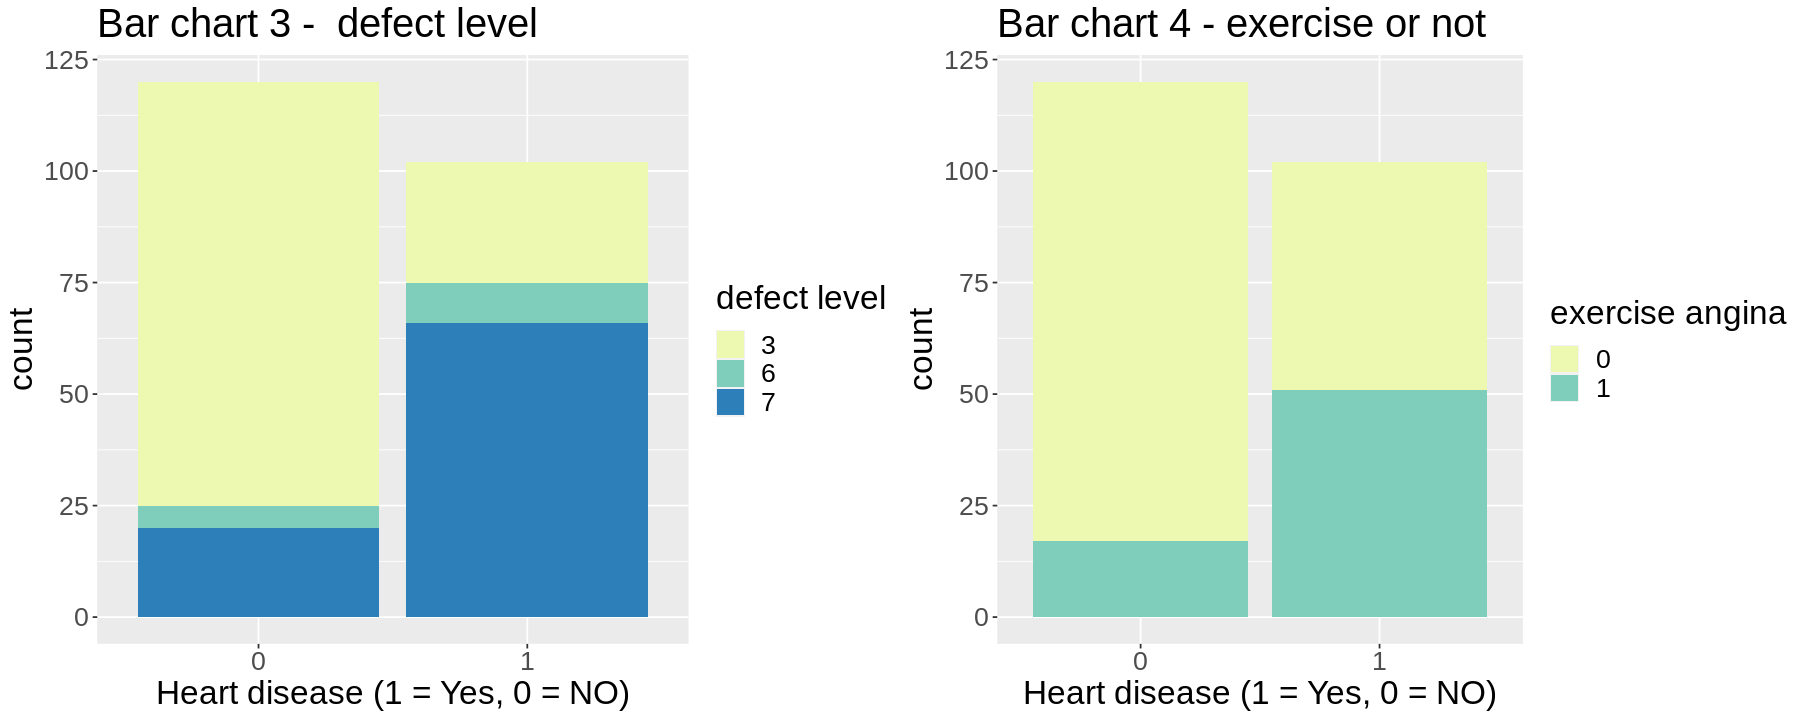

In [8]:
options(repr.plot.width = 15,repr.plot.height =6)
## Part 1

# use bar chart to compare the distribution of 'chest pain' in different heart disease group 
distofnum_CP <- hd_train |>
ggplot(aes(x = as_factor(heart_disease_diagnosis), fill = as_factor(chest_pain_type))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "Chest Pain level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 1 - Chest Pain level")+ 
scale_fill_brewer(palette="YlGnBu")


# use bar chart to compare the distribution of  ST segment slope in different heart disease group 
distofnum_SLOPE <- hd_train |>
ggplot(aes(x = as_factor(heart_disease_diagnosis), fill = as_factor(slope))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "ST segment slope") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 2 -  ST segment slope")+ 
scale_fill_brewer(palette="YlGnBu")
#the slope of the peak exercise ST segment

plot_grid( distofnum_CP,distofnum_SLOPE,nrow = 1)

# Part 2 
options(repr.plot.width = 15,repr.plot.height =6)

distofnum_thal <- hd_train |>
ggplot(aes(x = as_factor(heart_disease_diagnosis), fill = as_factor(thal))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "defect level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 3 -  defect level")+ 
scale_fill_brewer(palette="YlGnBu")

distofnum_exang <- hd_train |>
ggplot(aes(x = as_factor(heart_disease_diagnosis), fill = as_factor(exercise_angina))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "exercise angina") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 4 - exercise angina (Yes / No)")+ 
scale_fill_brewer(palette="YlGnBu")

#exercise induced angina (1 = yes; 0 = no)

plot_grid(distofnum_thal,distofnum_exang,nrow = 1)


#### Analysing bar chart

Each bar chart shows its variable has a significantly different distribution among the No heart disease group and having heart disease group, which leads to **a possible association between variables and heart disease**.   
  
For Bar Chart 1, a chest pain level higher means more painful the observation feels. We can observe that over **70%** heart disease group has level 4 chest pain, which increased significantly compared to the no-heart-disease group. There may be a positive association between chest pain level and heart disease. High chest pain on observation may reflect the presence of heart disease.  

For Bar chart 2, 2 level ST segment slope dominates in the heart disease group whereas 1 level ST segment dominates in the no-heart-disease group. 2 level ST segment may be a characteristic of heart disease.  

For Bar chart 3, similar to chest pain level, over **60** of the heart disease group has a **7** defect level, the portion of 7 defect level increased significantly from no-heart-disease. There may be a positive association between defect levels.  

For Bar chart 4, exercise angina increase a lot in the heart disease group. The presence of Heart disease may be bounded to angina happening during exercise. 

#### Why bar chart ?
Even though all variables are in numeric type, by interpreting the meaning of the data set, they are actually simplified from measurement to several levels which should be considered as a factor. For example, chest pain type is divided into 4 levels and expressed in number by 1,2,3,4. However, we keep each variable to be numeric since the KNN Classification Algorithm required the predictor to be numeric.


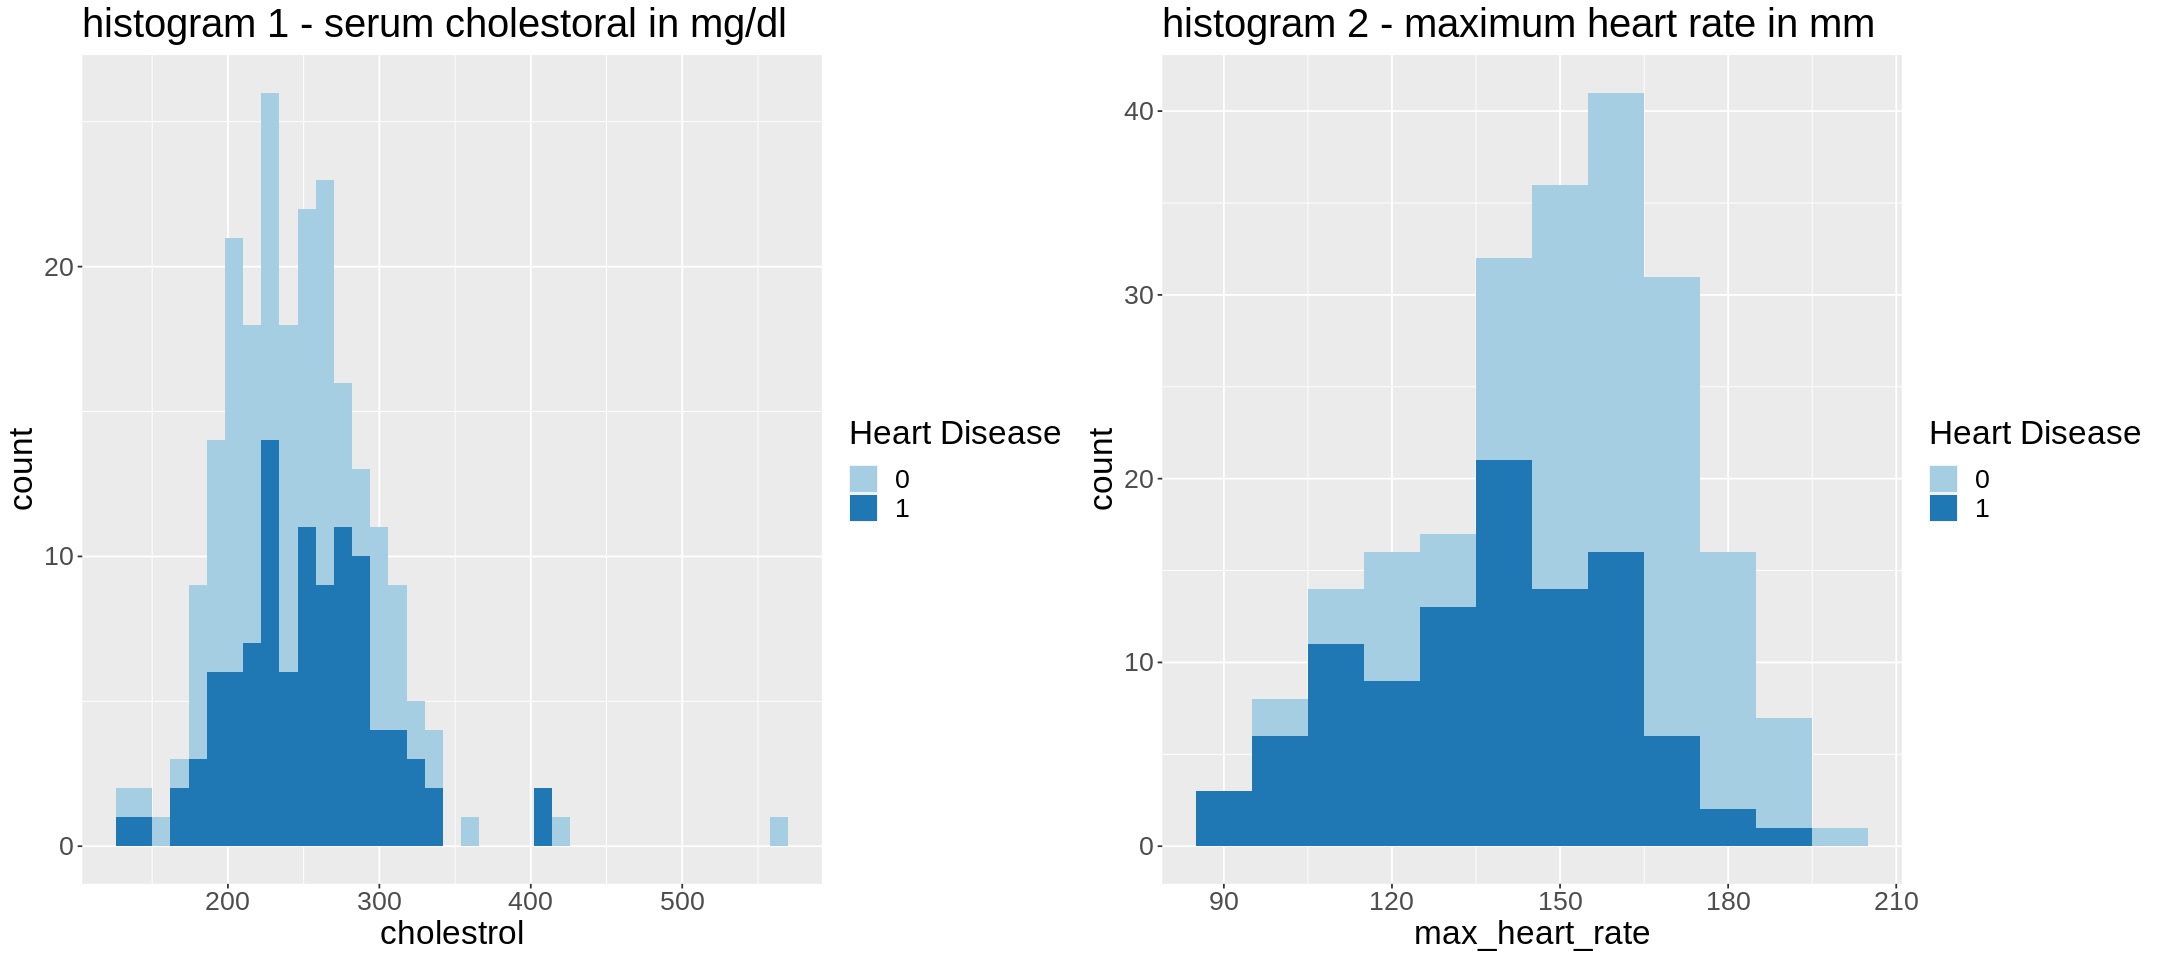

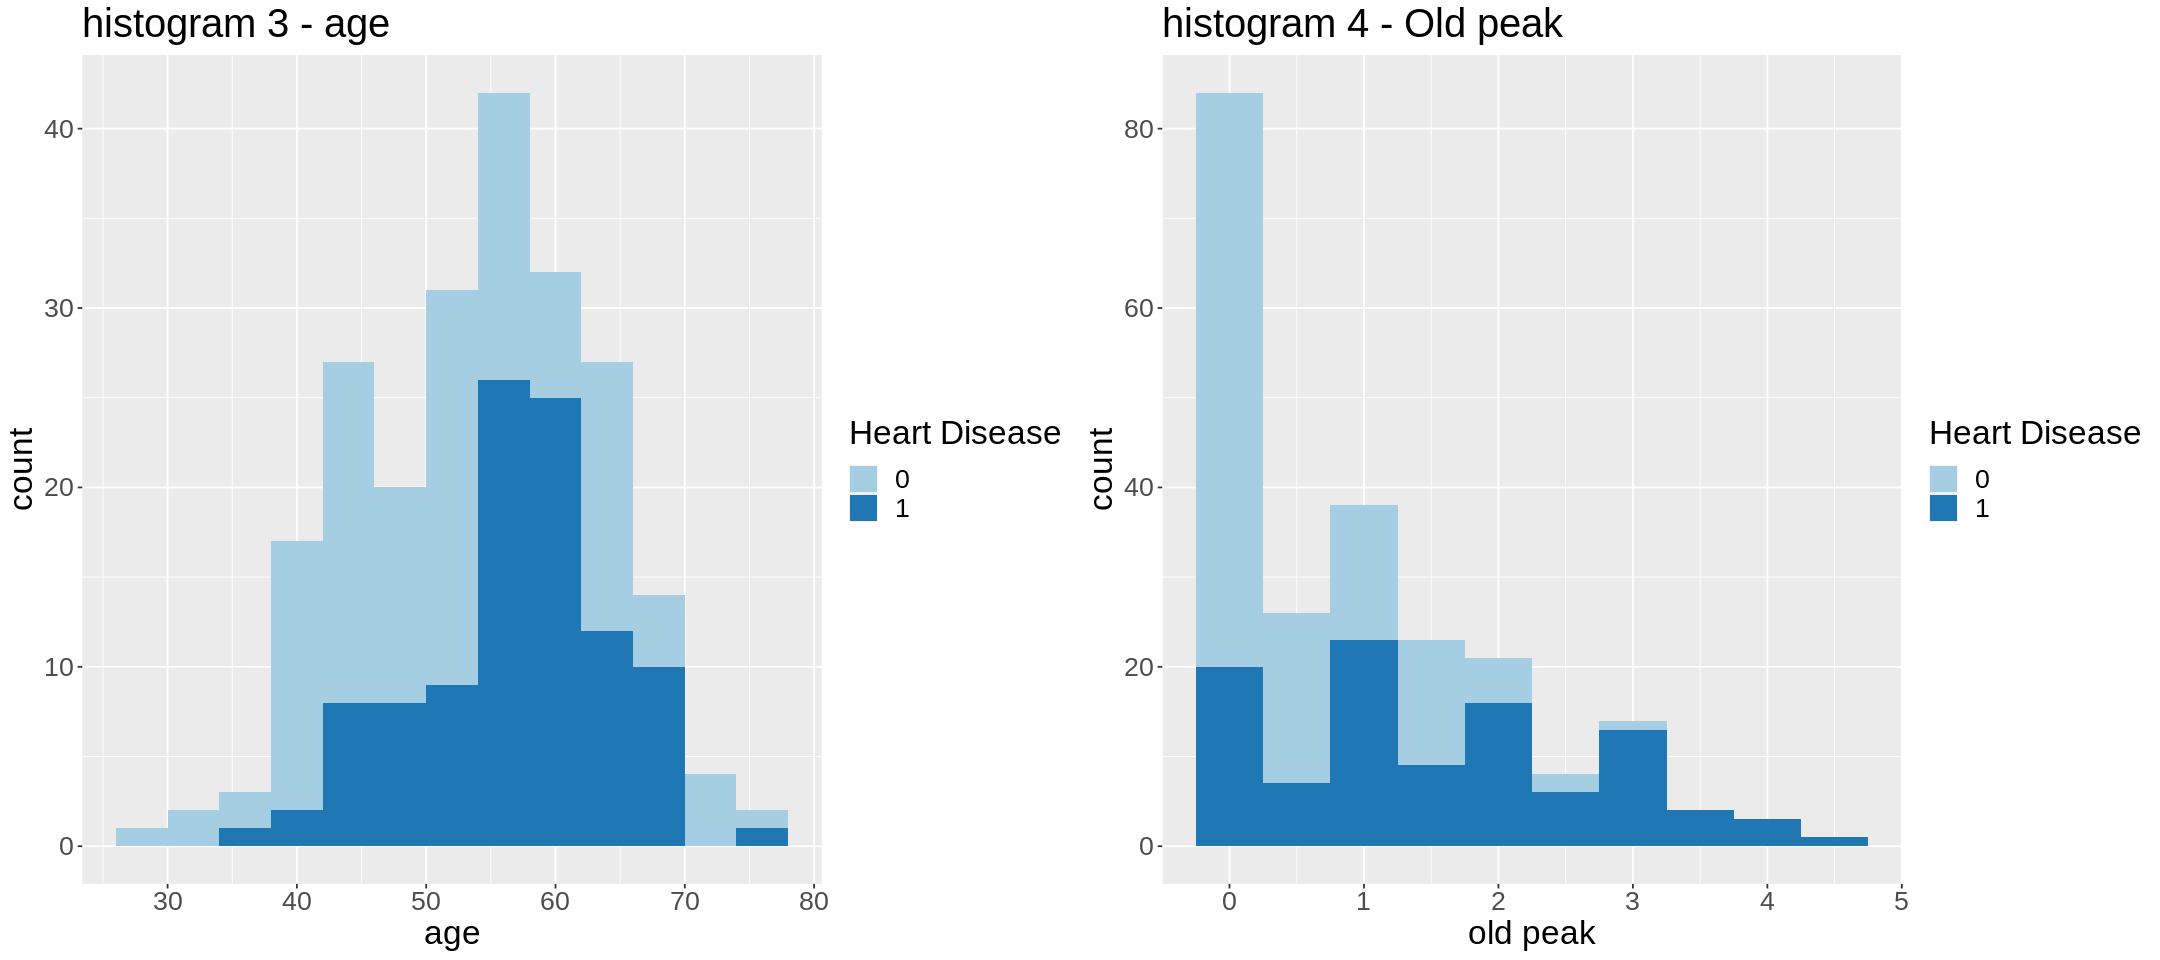

In [9]:

options(repr.plot.width = 18,repr.plot.height =8)

#The distribution of histogram
histogram_chol <- hd_train |>
ggplot(aes(x = cholestrol,  fill = as_factor(heart_disease_diagnosis))) +
geom_histogram(binwidth = 12) +
labs(x = "cholestrol", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 1 - serum cholestoral in mg/dl ") + 
scale_fill_brewer(palette="Paired")


histogram_thalach <-  hd_train |>
ggplot(aes(x = max_heart_rate, fill = as_factor(heart_disease_diagnosis))) +
geom_histogram(binwidth = 10) +
labs(x = "max_heart_rate",fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 2 - maximum heart rate in mm") + 
scale_fill_brewer(palette="Paired")

plot_grid(histogram_chol, histogram_thalach,nrow = 1)




histogram_age <- hd_train |>
ggplot(aes(x = age,  fill = as_factor(heart_disease_diagnosis))) +
geom_histogram(binwidth = 4) +
labs(x = "age", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 3 - age ")+ 
scale_fill_brewer(palette="Paired")

histogram_oldpeak <- hd_train |>
ggplot(aes(x = oldpeak,  fill = as_factor(heart_disease_diagnosis))) +
geom_histogram(binwidth = 0.5) +
labs(x = "old peak", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 4 - Old peak ")+ 
scale_fill_brewer(palette="Paired")

plot_grid(histogram_age, histogram_oldpeak,nrow = 1)

#### Analyzation on histogram
For histogram 1, see the shape of heart disease group and non heart disease group there is no different. That may because cholestrol also related to age where as the age of our observation is around the same, 40-60.  

For histogram 2, Noted that the histogram of no-heart disease group skewed to the left whereas the histogram of heart disease group skwed to the right. There may be evidence that the presence of heart disease bounds with low heart rate.   

For histogram 3, see the shape of heart disease group is aproximated symmetry  and non heart disease group there is slightly left-skewed. The heart disease group has a higher avergae age.

For histogram 4, Noted that the histogram of no-heart disease group extremely skewed to the right whereas the histogram of heart disease group slightly skwed to the right. There may be evidence that the presence of heart disease bounds with high old peak.   

# KNN Classification Algorithm
----

### Cross Validation to Choose Best K Value 

In [10]:
#recipe with data removed fbs, restecg, ca columns
set.seed(1231) 

#create recipe
knn_recipe <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + cholestrol + max_heart_rate + exercise_angina + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

#create the tuning model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |>
set_mode("classification") 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.8158586,5,0.02965279,Preprocessor1_Model09
10,accuracy,binary,0.8158586,5,0.02965279,Preprocessor1_Model10
11,accuracy,binary,0.8157576,5,0.02807572,Preprocessor1_Model11
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,accuracy,binary,0.7525253,5,0.02047231,Preprocessor1_Model04
1,accuracy,binary,0.7027273,5,0.01936893,Preprocessor1_Model01
2,accuracy,binary,0.7027273,5,0.01936893,Preprocessor1_Model02


[1] "Table 4. Cross model Model Estimated Accuracies for K = 1 to 12"


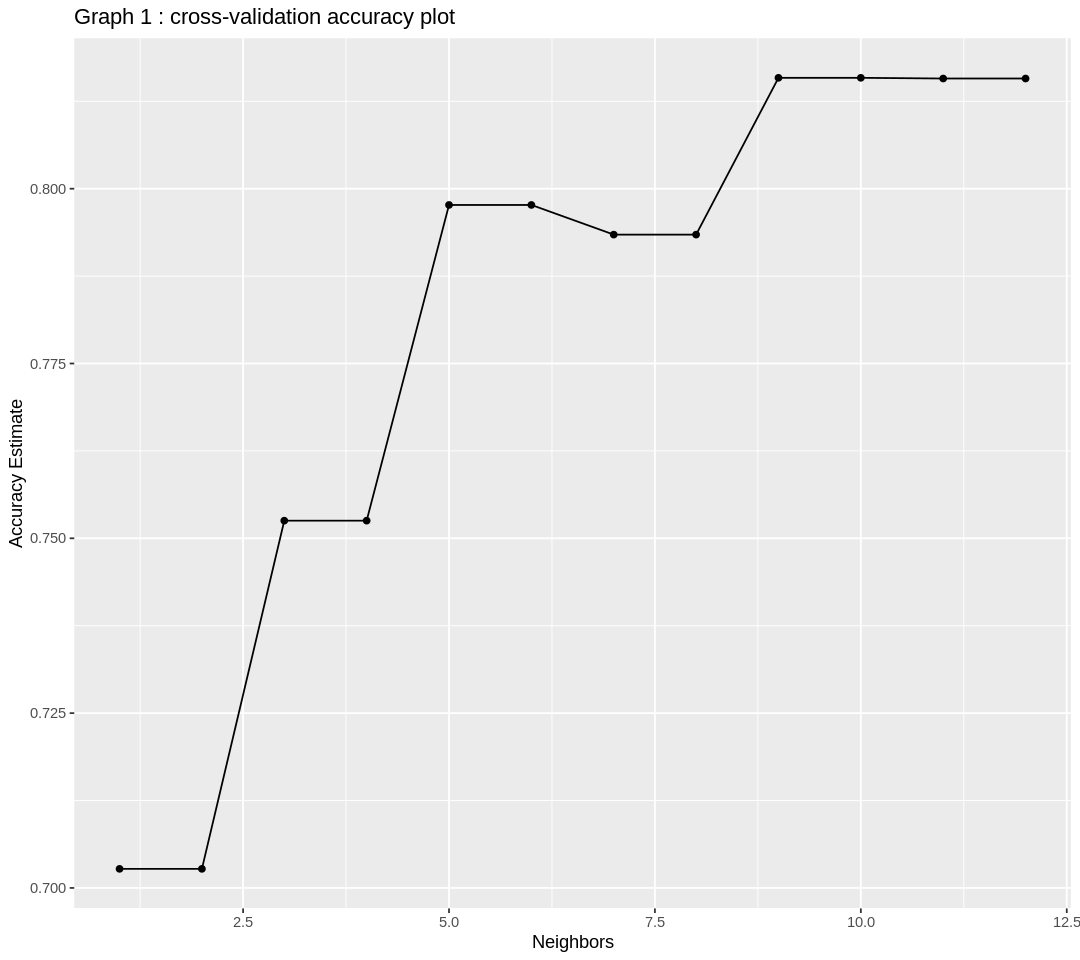

In [11]:
set.seed(1231) 

# create 5 fold traning data
knn_vfold <- vfold_cv(hd_train, v = 5, strata = heart_disease_diagnosis)

# tuning from K = 1 to K = 12
gridvals <- tibble(neighbors = seq(from = 1, to =12))

# collecting summary on different K value cross validation 
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() 

# collecting avg accuarcy with different K value
accuracies <- knn_results |> 
       filter(.metric == "accuracy") |>
       arrange(desc(mean))
accuracies

print("Table 4. Cross model Model Estimated Accuracies for K = 1 to 12")
options(repr.matrix.max.rows = 6)

# visualizing avg accuarcy with different K value
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Graph 1 : cross-validation accuracy plot")

options(repr.plot.width = 9,repr.plot.height =8)
cross_val_plot

**K value**  
We are choosing **K = 10** as our final model because it has the highest accuracy among k = 1 to k = 12 tuning values. Besides, moving a bit right or left from K = 10, accuracy tends to be stable without a huge decrease or increase around.  

## Final Model 
---

In [12]:
#Create final model with K = 10
set.seed(1231) # make sure reproducibility
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
set_engine("kknn") |>
set_mode("classification") 

knn_fit <- workflow() |>
add_recipe(knn_recipe) |>
add_model(knn_spec) |>
fit(data = hd_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1981982
Best kernel: rectangular
Best k: 10

In [13]:
#testing model predictions with testing set

set.seed(1231) # make sure reproducibility

test_predictions <- predict(knn_fit,hd_test) |>
bind_cols(hd_test)

knn_metrics <- test_predictions |>
metrics(truth = heart_disease_diagnosis, estimate = .pred_class)
knn_metrics

print("Table 5. KNN metrics")

#accuracy seems unaffected when applying model to testing dataset

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8552632
kap,binary,0.7081006


[1] "Table 5. KNN metrics"


### Final estimate accuracy 
Our final model has an accuracy of 0.85 on the test model. 

---
## Curse of Dimensionality Issue
---
Due to the high number of explanatory variables, our model may suffer from the "curse of dimensionality", as we only have 222 samples of data for a model that exists in a 9-dimensional space. Thus, the distances between many datapoints may be very far from each other, resulting in inaccurate predictions.  
To address this, we could use MFA (muliple factor analysis), a combination of PCA (principle component analysis) and MCA (multiple correspondence analysis), in order to determine the most significant explanatory variables for our model. However, this requires additional libraries and is also outside the scope of this course, so instead, we conducted some research on which variables are historically more significant at explaining heart disease.  
  
We know both blood pressure and cholesterol are common indicators of heart disease, so we should keep these variables. However, in this study, cholesterol was measured as a total, as opposed to separate metrics for HDL (Protective against heart disease) and LDL (A cause of heart disease), and thus we will test a model excluding the variable.  
  
Also, a common test for heart disease in diagnosis are an ECG, however we exclude this variable in favour of specifics of the ECG, which include oldpeak and slope, referencing the ST-segment specifically. As oldpeak is the ST-segment depression induced by exercise, this may be correlated to the chest pain induced by exercise (exang), so we will test a model excluding this variable.
  
We can test a model excluding the chest pain type (cp) variable, as that is highly subjective and our model is predicting the existence of any chest pain, irrespective of type, for which this variable may be redundant information. 

In [14]:
#Model excluding cholesterol
knn_recipe_no_chol <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + max_heart_rate + exercise_angina + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_chol <- workflow() |>
    add_recipe(knn_recipe_no_chol) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_chol <- predict(knn_fit_no_chol,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_chol
print("Table 6 : Model excluding cholesterol")

#Model excluding exercise_angina
knn_recipe_no_exang <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + cholestrol + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_exang <- workflow() |>
    add_recipe(knn_recipe_no_exang) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_exang <- predict(knn_fit_no_exang,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth = heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_exang
print("Table 7 : Model excluding exercise_angina")

#Model excluding chest_pain_type
knn_recipe_no_chest_pain_type <- recipe(heart_disease_diagnosis ~ age + resting_bp + cholestrol + exercise_angina + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_cp <- workflow() |>
    add_recipe(knn_recipe_no_chest_pain_type) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_cp <- predict(knn_fit_no_cp,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_cp
print("Table 8 : Model excluding chest_pain_type")
#Model excluding all three
knn_recipe_no_all <- recipe(heart_disease_diagnosis ~ age + resting_bp + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())
 
knn_fit_no_all <- workflow() |>
    add_recipe(knn_recipe_no_all) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_all <- predict(knn_fit_no_all,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)
knn_metrics_no_all
print("Table 9 : Model excluding all three")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8421053
kap,binary,0.6808957


[1] "Table 6 : Model excluding cholesterol"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8157895
kap,binary,0.6292683


[1] "Table 7 : Model excluding exercise_angina"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7894737
kap,binary,0.5745276


[1] "Table 8 : Model excluding chest_pain_type"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7631579
kap,binary,0.5172900


[1] "Table 9 : Model excluding all three"


### Conclusion
As we can see from the tables above, it seems that no variables are redundant to the model fit, and reducing the dimensionality through this method would result in a **loss of accuracy** on the testing set. Thus, we continue with the original model with 9 predictors.

# Discussion:

    For our final model, we decided on using a KNN classification model. We rejected the simple linear regression models as our response variable is categorical (the person either does or does not suffer from heart disease). Another reason that simple linear regression would not work for this problem is the number of predictors. With the methods learned in class we cannot reduce the number of dimensions effectively (as seen in the above "curse of dimensionality" section). Thus, at minimum we would need to use a multiple regression model. However, this would bring rise to another issue, in that our response variable is categorical (binary). This does not interact well with a linear regression model, and it would be preferable to use a logistic regression to model this. Regardless, all of this is outside the scope of the course, and may not even result in a more accurate model (without much more investigation and computation) compared to our KNN model, which has a very good accuracy of approximately 85.5% on the testing set.

    There were some surprising factors that were found during the data analysis. The most interesting would be the fact that cholesterol, widely known as a major cause of heart disease, is not actually a very significant predictor in our model (as seen in histogram1, cholesterol seems not not affect distribution of heart disease whatsoever). This may be due to several factors, such as cholesterol representing total cholesterol and not the specific types. However, this may also indicate a dependence relationship between the cholesterol variable and some of the other predictors we used, resulting in the significance of the cholesterol variable being reduced.
    
    In terms of further questions and analysis, the first step would be to do some form of dimensionality reduce as mentioned earlier in the report. It would also be interesting to investigate the effectiveness of the model on other sets of heart disease data, to see if it performs similarly to the testing set. I suspect it should perform relatively well, given the new data is in a similar range and of a similar type, as we can see the model itself is not overfit due to the testing accuracy actually being higher than the fit accuracy on the training set. 
    
    It may also be prudent to, in further studies, investigate dependence relationships between the predictor variables as well as increasing the sample size if possible. Both of these would help reduce the difficulty in modelling due to a high number of predictors with low sample size. Investigating these dependence relationships would also aid in discovering more accurate correlations between the predictors and heart disease, as some variables may not be truely significant, but instead also correlated to the same predictor as heart disease is.


# References
--- 
<span style="color:red">
**Need explaination**
</span>